## Forest fires in the northeast region of Portugal
Data set: https://archive.ics.uci.edu/ml/datasets/forest+fires

Zadaniem jest klasyfikacja względem określonych danych np. temperatury lub np. obszaru.

Ściągnąć dane<br>
Wczytać dane<br>
Przeskalować dane, również wymienić dane miesiące i dni tygodnia na dane liczbowe<br>
Podzielić dane na dane testujące i trenujące<br>
Wybrać omawiane modele<br>
Wytrenować modele<br>
Porównać modele

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sklearn import tree

## Reading the data
1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9<br>
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9<br>
3. month - month of the year: 'jan' to 'dec'<br>
4. day - day of the week: 'mon' to 'sun'<br>
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20<br>
6. DMC - DMC index from the FWI system: 1.1 to 291.3<br>
7. DC - DC index from the FWI system: 7.9 to 860.6<br>
8. ISI - ISI index from the FWI system: 0.0 to 56.10<br>
9. temp - temperature in Celsius degrees: 2.2 to 33.30<br>
10. RH - relative humidity in %: 15.0 to 100<br>
11. wind - wind speed in km/h: 0.40 to 9.40<br>
12. rain - outside rain in mm/m2 : 0.0 to 6.4<br>
13. area - the burned area of the forest (in ha): 0.00 to 1090.84<br>

In [2]:
path = 'forestfires.csv'
names = ['x-axis', 'y-axis', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'humidity', 'wind', 'rain', 'area']
dataset = pd.read_csv(path, names=names, skiprows=[0])
dataset.head()


,x-axis,y-axis,month,day,FFMC,DMC,DC,ISI,temp,humidity,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


## Changing the names of the months & days to their numeric values

In [3]:
months = {'jan' : 1, 'feb' : 2, 'mar' : 3, 'apr' : 4, 'may' : 5, 'jun' : 6, 'jul' : 7, 'aug' : 8, 'sep' : 9, 'oct' : 10, 
           'nov' : 11, 'dec' : 12}
days = {'mon' : 1, 'tue' : 2, 'wed' : 3, 'thu' : 4, 'fri' : 5, 'sat' : 6, 'sun' : 7}
dataset['month'] = dataset.month.astype(object)
dataset['month'] = dataset['month'].replace(months)
dataset['day'] = dataset.day.astype(object)
dataset['day'] = dataset['day'].replace(days)
dataset.head()

,x-axis,y-axis,month,day,FFMC,DMC,DC,ISI,temp,humidity,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


## Preprocessing
x = attributes, y = labels

In [4]:
cols = list(dataset.columns.values)
cols.pop(cols.index('humidity'))
dataset = dataset[cols+['humidity']] # moving humidity column to the end for easier slicling
x = dataset.iloc[:, :12].values
y = dataset.iloc[:, -1].values


## Dividing a Dataset into Training and Validation Samples

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 82)

## Feature scaling

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Decision Tree

In [7]:
from sklearn.tree import DecisionTreeClassifier
classifier =DecisionTreeClassifier(max_depth = 2, random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

## Prediction

In [8]:
y_pred = classifier.predict(x_test)
print(y_pred)


[27 27 39 27 39 27 39 27 39 27 27 39 27 27 27 27 27 27 27 27 27 27 27 39
 39 39 27 39 27 27 27 27 39 27 39 27 27 39 39 27 27 27 39 39 39 27 27 27
 39 27 27 27 39 27 27 39 27 27 27 27 39 27 27 27 39 39 27 27 27 27 27 27
 39 27 39 39 27 27 27 27 39 27 39 39 27 39 27 27 39 27 27 27 27 27 27 27
 39 27 27 27 27 27 27 27]


In [9]:
score = classifier.score(x_test, y_test)
score

0.04807692307692308

## Algorithm Evaluation

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

          19       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         2
          22       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         2
          25       0.00      0.00      0.00         3
          26       0.00      0.00      0.00         1
          27       0.07      0.83      0.13         6
          28       0.00      0.00      0.00         5
          29       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         2
          31       0.00      0.00      0.00         2
          32       0.00      0.00      0.00         4
          33       0.00      0.00      0.00         4
          34       0.00      0.00      0.00         2
          35       0.00      0.00      0.00         4
          36   

## Determining the depth of the tree 

In [13]:
max_depth_range = list(range(1, 6))
accuracy = []
for depth in max_depth_range:
    classifier = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    classifier.fit(x_train, y_train)
    score = classifier.score(x_test, y_test)
    accuracy.append(score)

Text(0, 0.5, 'Accuracy')

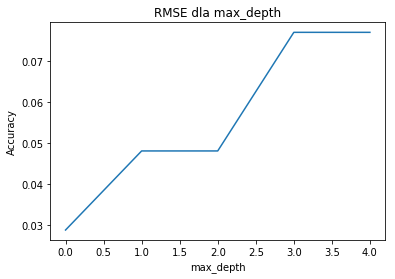

In [12]:
plt.plot(accuracy)
plt.title('RMSE dla max_depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

[Text(194.30357142857144, 199.32, 'X[8] <= 0.794\ngini = 0.976\nsamples = 413\nvalue = [2, 1, 1, 3, 1, 5, 4, 11, 7, 5, 27, 6, 8, 5\n5, 8, 11, 14, 16, 8, 5, 10, 23, 11, 8, 14, 13\n11, 12, 10, 8, 6, 4, 7, 9, 2, 9, 9, 3, 5, 3\n5, 6, 1, 3, 3, 4, 6, 2, 7, 3, 1, 5, 4, 3\n2, 2, 3, 1, 3, 5, 2, 1, 2, 1, 2, 1, 2, 1\n1, 1]'),
 Text(121.56428571428572, 163.07999999999998, 'X[8] <= -0.024\ngini = 0.976\nsamples = 330\nvalue = [2, 1, 1, 2, 1, 3, 1, 7, 3, 3, 11, 2, 3, 2\n4, 3, 9, 11, 12, 2, 5, 8, 21, 10, 6, 11, 11\n11, 11, 10, 8, 6, 4, 5, 8, 2, 8, 9, 3, 5, 3\n5, 6, 1, 3, 3, 3, 6, 2, 7, 3, 1, 5, 4, 3\n2, 2, 3, 1, 3, 5, 2, 1, 2, 1, 2, 1, 2, 1\n1, 1]'),
 Text(63.77142857142857, 126.83999999999999, 'X[5] <= -0.96\ngini = 0.975\nsamples = 184\nvalue = [0, 0, 0, 0, 1, 3, 0, 4, 3, 2, 10, 1, 2, 2\n1, 0, 4, 0, 4, 0, 0, 2, 6, 2, 0, 5, 8, 3\n6, 8, 5, 2, 2, 3, 8, 1, 7, 6, 0, 3, 2, 3\n6, 1, 2, 3, 3, 4, 1, 6, 3, 1, 2, 1, 3, 1\n2, 3, 1, 3, 5, 2, 1, 2, 1, 2, 1, 2, 1, 1\n1]'),
 Text(31.885714285714286, 90.6, 'X[8] <=

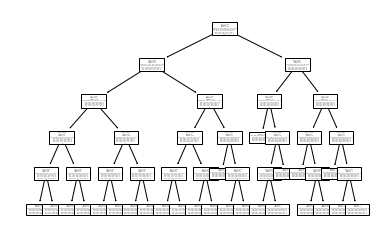

In [13]:
tree.plot_tree(classifier.fit(x_train, y_train)) 